<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [12]:
sat_filepath = '/Users/jspath/Desktop/DSI-SF-4-jspath9/datasets/state_sat_scores/sat_scores.csv'

In [161]:
#sat = pd.read_csv(sat_filepath)
#use a 'with' statement
with open(sat_filepath) as f:
    data = f.read()
    my_list = list(f)
    print my_list
#   do something with data
# Row 1 is the keys
# Rows 2-n are the values
# get first slice of the list and iterate through everything else [1:]

[]


### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [162]:
sat_data = pd.read_csv(sat_filepath)
print type(sat_data)

<class 'pandas.core.frame.DataFrame'>


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [24]:
sat_data.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

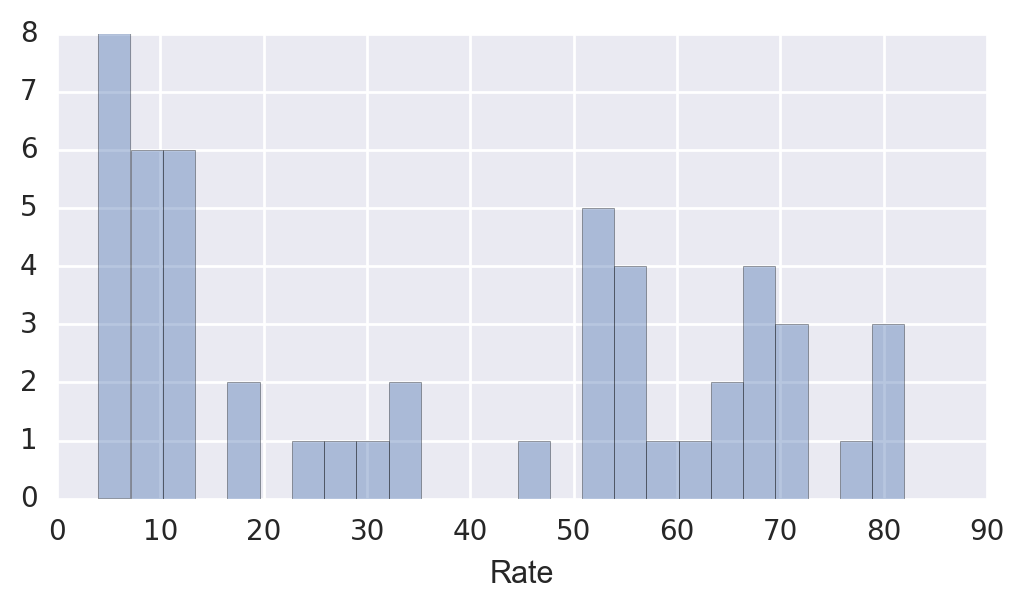

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax = sns.distplot(sat_data['Rate'], kde=False, ax=ax, bins=25, axlabel='Rate')
plt.show()

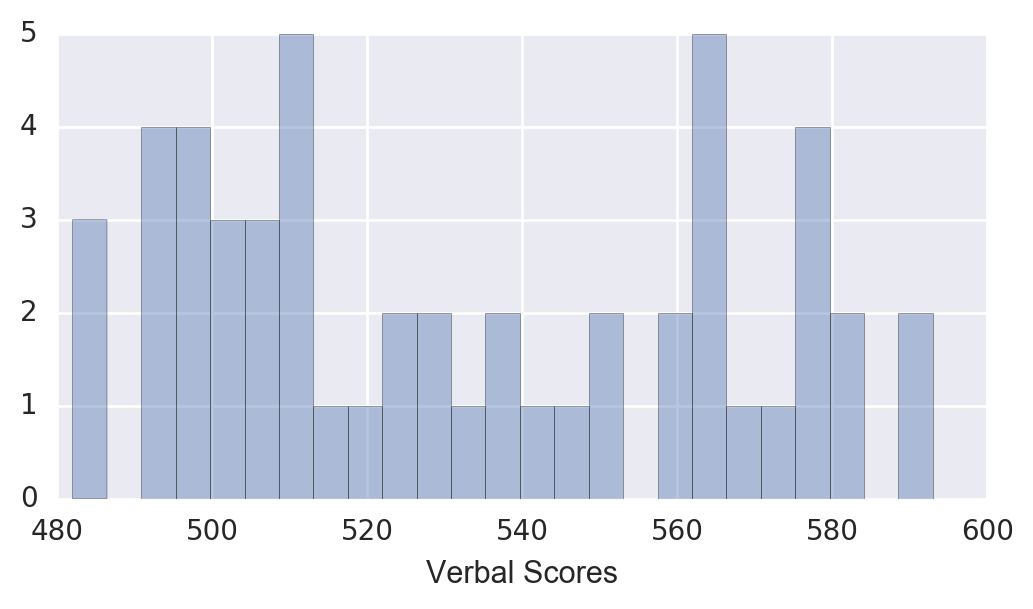

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax = sns.distplot(sat_data['Verbal'], kde=False, ax=ax, bins=25, axlabel='Verbal Scores')
plt.show()

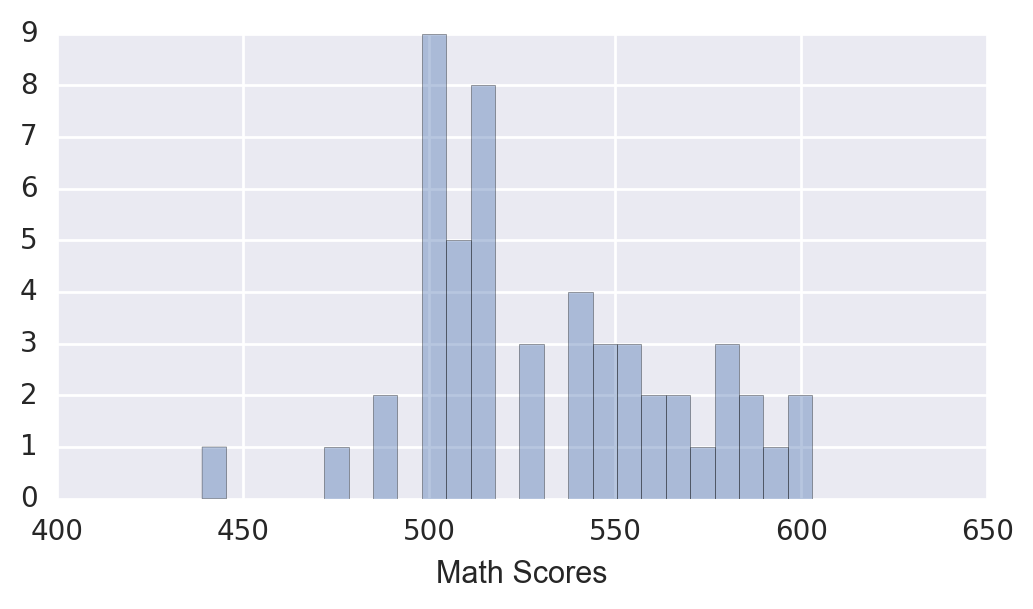

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax = sns.distplot(sat_data['Math'], kde=False, ax=ax, bins=25, axlabel='Math Scores')
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

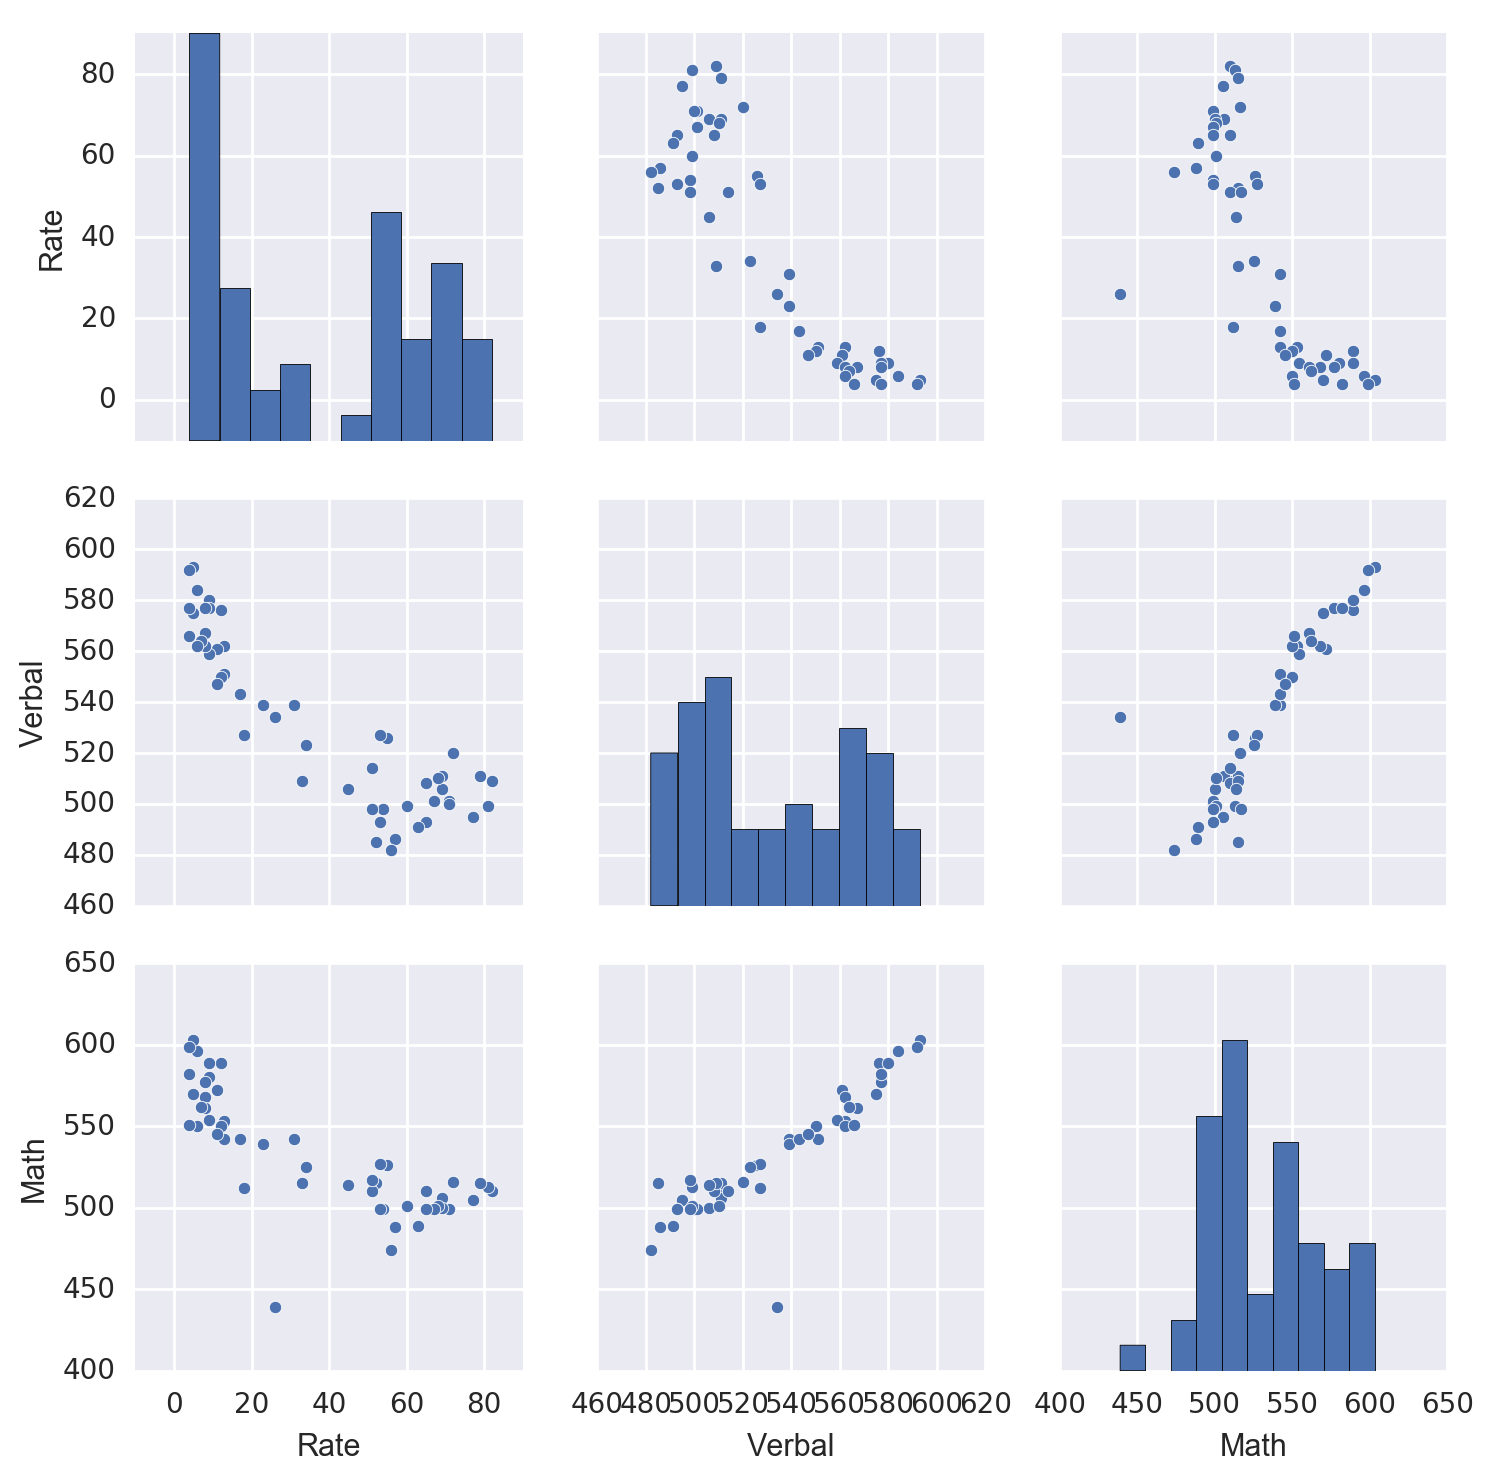

In [53]:
pp = sns.pairplot(sat_data, vars=["Rate", "Verbal", "Math"])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

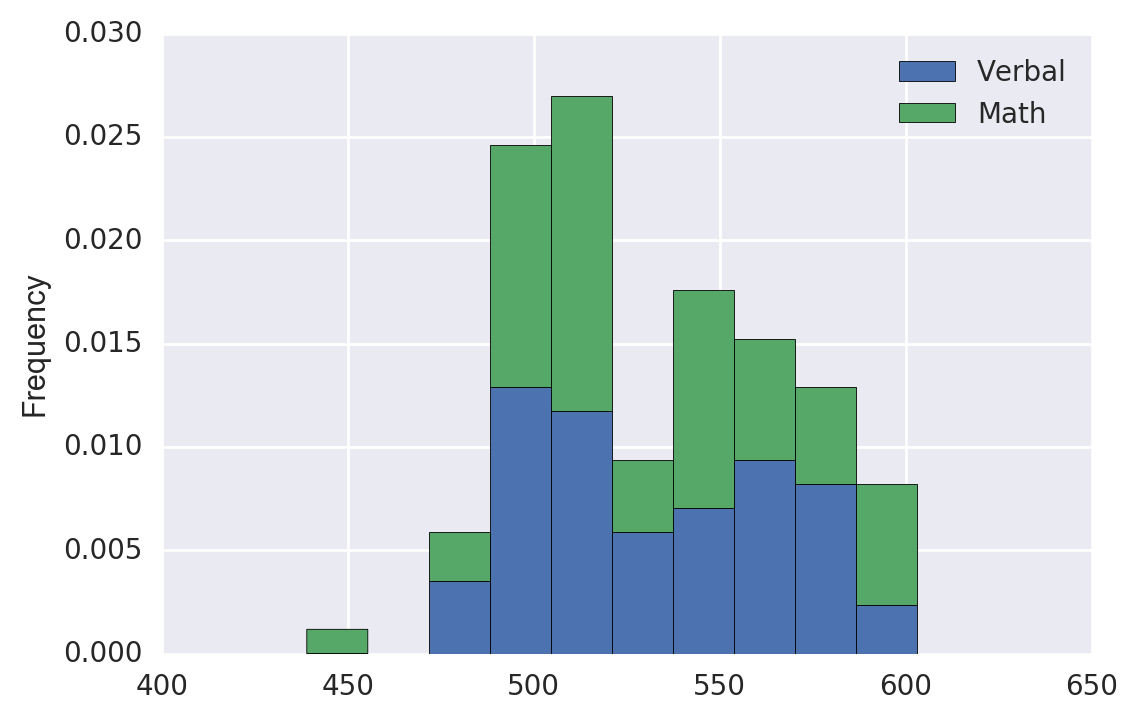

In [79]:
sat_data_vm = sat_data.ix[:,2:4]
#sat_data.plot.hist('Verbal', stacked=True, normed = True)
sat_data_vm.plot.hist(stacked=True, normed = True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

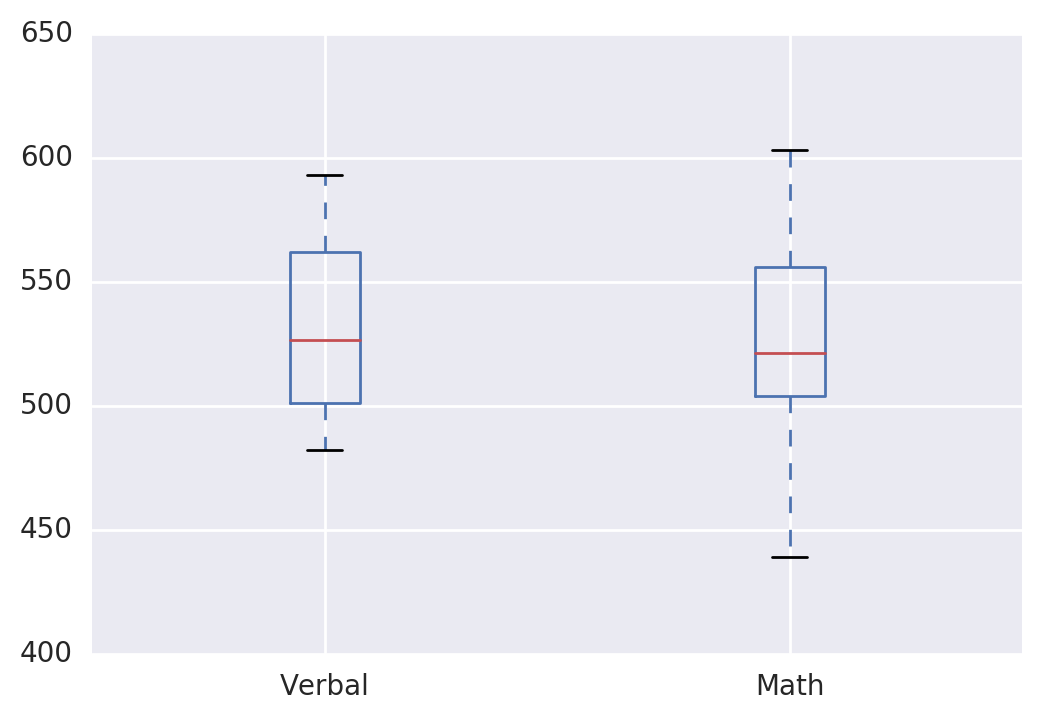

In [82]:
sat_data_vm.plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [194]:
sat_mean = sat_data[:2].mean()
sat_mean_val = sat_mean[2]
print 'SAT data mean value = ', sat_mean_val
temp = sat_data[sat_data['Verbal'] > sat_mean_val]
verbal_above = temp.loc[:,['State','Verbal']]
mean_var_cnt = verbal_above.count()
print 'Number of states with a value about the mean:'
print mean_var_cnt

SAT data mean value =  511.5
Number of states with a value about the mean:
State     30
Verbal    30
dtype: int64


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [197]:
sat_median = sat_data[:2].median()
print 'SAT data median value = ', sat_median_val
sat_median_val = sat_median[2]
temp = sat_data[sat_data['Verbal'] > sat_median_val]
verbal_above = temp.loc[:,['State','Verbal']]
median_var_cnt = verbal_above.count()
print 'Number of states with a value about the mean:'
print median_var_cnt
print 'Median count and mean count are the same. \n Conclusion: this dataset has no skew.'

SAT data median value =  511.5
Number of states with a value about the mean:
State     30
Verbal    30
dtype: int64
Median count and mean count are the same. 
 Conclusion: this dataset has no skew.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [210]:
sat_data['Diff'] = (sat_data['Verbal'] - sat_data['Math']).astype(float)
print sat_data

   State  Rate  Verbal  Math  Diff
0     CT    82     509   510  -1.0
1     NJ    81     499   513 -14.0
2     MA    79     511   515  -4.0
3     NY    77     495   505 -10.0
4     NH    72     520   516   4.0
5     RI    71     501   499   2.0
6     PA    71     500   499   1.0
7     VT    69     511   506   5.0
8     ME    69     506   500   6.0
9     VA    68     510   501   9.0
10    DE    67     501   499   2.0
11    MD    65     508   510  -2.0
12    NC    65     493   499  -6.0
13    GA    63     491   489   2.0
14    IN    60     499   501  -2.0
15    SC    57     486   488  -2.0
16    DC    56     482   474   8.0
17    OR    55     526   526   0.0
18    FL    54     498   499  -1.0
19    WA    53     527   527   0.0
20    TX    53     493   499  -6.0
21    HI    52     485   515 -30.0
22    AK    51     514   510   4.0
23    CA    51     498   517 -19.0
24    AZ    34     523   525  -2.0
25    NV    33     509   515  -6.0
26    CO    31     539   542  -3.0
27    OH    26     5

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [217]:
data_greater = sat_data.sort_values(by='Diff', ascending=1)
print data_greater.head()

data_greater = sat_data.sort_values(by='Diff', ascending=0)
print data_greater.head()

   State  Rate  Verbal  Math  Diff
21    HI    52     485   515 -30.0
23    CA    51     498   517 -19.0
1     NJ    81     499   513 -14.0
33    IL    12     576   589 -13.0
44    WI     6     584   596 -12.0
   State  Rate  Verbal  Math  Diff
27    OH    26     534   439  95.0
50    MS     4     566   551  15.0
29    WV    18     527   512  15.0
45    AR     6     562   550  12.0
32    NM    13     551   542   9.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [273]:
sat_data.corr().iloc[:,~pd.Int64Index(np.arange(len(sat_data.columns))).isin([4])]
#sat data [columns except state].coorr()
#Correlation values between the same variables are always 1
#For Rate, Verbal and Math have a very strong negative correlation. Therefore as rate goes up,
#these numbers are likely to decrease. Rate has a slight negative correlation with Diff.
#Both Verbal and Math have strong positive correlations with each other. Verbal have a very high correlation
#each other.
#As for Diff, you can see that there is little correlation between the Verbal and Diff amounts but there is a low to
#moderate negative correalation between the Math value and Diff. This implies that the greater the Diff,
#the lower the Math score.

,Rate,Verbal,Math,Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [275]:
sat_data.describe()

,Rate,Verbal,Math,Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [106]:
iowa_file = '/Users/jspath/Desktop/DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa_df = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [108]:
print 'Shape:'
iowa_df.shape
iowa_df.columns
iowa_df.info()
iowa_df.describe()
#saht is a object taht shouldnt be one? make a new _clean column
#look at anything that looks weird - outliers - bad zip codes
#set to null if it is missing backgrouns - you couild impute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [280]:
iowa_df['Category Name'].value_counts()

VODKA 80 PROOF                        35373
CANADIAN WHISKIES                     27087
STRAIGHT BOURBON WHISKIES             15342
SPICED RUM                            14631
VODKA FLAVORED                        14001
TEQUILA                               12109
BLENDED WHISKIES                      11547
WHISKEY LIQUEUR                       10902
IMPORTED VODKA                        10668
PUERTO RICO & VIRGIN ISLANDS RUM      10062
FLAVORED RUM                           7282
TENNESSEE WHISKIES                     7081
AMERICAN COCKTAILS                     6929
AMERICAN GRAPE BRANDIES                6589
AMERICAN DRY GINS                      6559
IMPORTED VODKA - MISC                  6506
MISC. IMPORTED CORDIALS & LIQUEURS     6299
CREAM LIQUEURS                         6284
SCOTCH WHISKIES                        5375
IMPORTED GRAPE BRANDIES                4614
IMPORTED SCHNAPPS                      4249
MISC. AMERICAN CORDIALS & LIQUEURS     3394
100 PROOF VODKA                 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [ ]:
#take the datetime field - convert to datetime type - put month and year in new coliumn. Which stores don't have data for every month - remove them.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [ ]:
Group and sort - check accounting

### 10.2 Calculate the profit each store is making in 2015.


In [ ]:
product profits

### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [ ]:
burito bowl exercise

### 10.5 Do relationships exist between the broader liquor type and profit?

In [ ]:
correlatino speason

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
#categorize tax rate based on volumne of sales or gross profit

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
